<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
my_path="/content/drive/MyDrive/CS491/Data/"

# Download a novel and prepare for analysis

Some pre-processing: download novel from Gutenberg, then remove preamble and postamble

In [48]:
title = 'The Golden Bowl'
tit='Bowl'
author = 'Henry James'
url = 'https://www.gutenberg.org/cache/epub/4264/pg4264.txt'
path = my_path

# title = 'The Americans'
# tit='Americans'
# author = 'Henry James'
# url = 'https://www.gutenberg.org/cache/epub/177/pg177.txt'
# path = my_path

In [111]:
import os
# Check if the file is stored locally
filename = my_path+ title
if os.path.isfile(filename) and os.stat(filename).st_size != 0:
        print("{title} file already exists".format(title=title))
        with open(filename, 'r') as f:
            raw = f.read()

else:
    print("{title} file does not already exist. Grabbing from Project Gutenberg".format(title=title))
    response = request.urlopen(url)
    raw = response.read().decode('utf-8-sig')
    print("Saving {title} file".format(title=title))
    with open(filename, 'w') as outfile:
        outfile.write(raw)

The Golden Bowl file already exists


In the file browser to the left, open the book. The text should (might?) appear in a cell on the right. Delete preamble and postamble, then save.

In [50]:
##These two lines demonsrate that you have succeeded in removing the Guttenberg preamble and postamble

print(f"first 100 characters: {raw[:100]}")
print(f"last 100 characters: {raw[-100:]}")

first 100 characters:        The Prince had always liked his London, when it had come to him; he was one of the modern Rom
last 100 characters: angely lighted his eyes that, as for pity and dread of them, she buried her own in his breast.      


In [51]:
# first, remove unwanted new line and tab characters from the text
for char in ["\n", "\r", "\d", "\t"]:
   raw = raw.replace(char, " ")

with open(filename, 'w') as outfile:
    outfile.write(raw)

In [52]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
all_tokens=word_tokenize(raw)#.lower())

In [54]:
all_tokens[60:80]

['tribute',
 ',',
 'he',
 'recognised',
 'in',
 'the',
 'present',
 'London',
 'much',
 'more',
 'than',
 'in',
 'contemporary',
 'Rome',
 'the',
 'real',
 'dimensions',
 'of',
 'such',
 'a']

In [55]:
clean_tokens=[word for word in all_tokens if word.isalpha()]

In [56]:
clean_tokens[60:80]

['in',
 'the',
 'present',
 'London',
 'much',
 'more',
 'than',
 'in',
 'contemporary',
 'Rome',
 'the',
 'real',
 'dimensions',
 'of',
 'such',
 'a',
 'case',
 'If',
 'it',
 'was']

# Zipf's Law

[Zipf's Law Wiki](https://en.wikipedia.org/wiki/Zipf%27s_law)

In [57]:
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

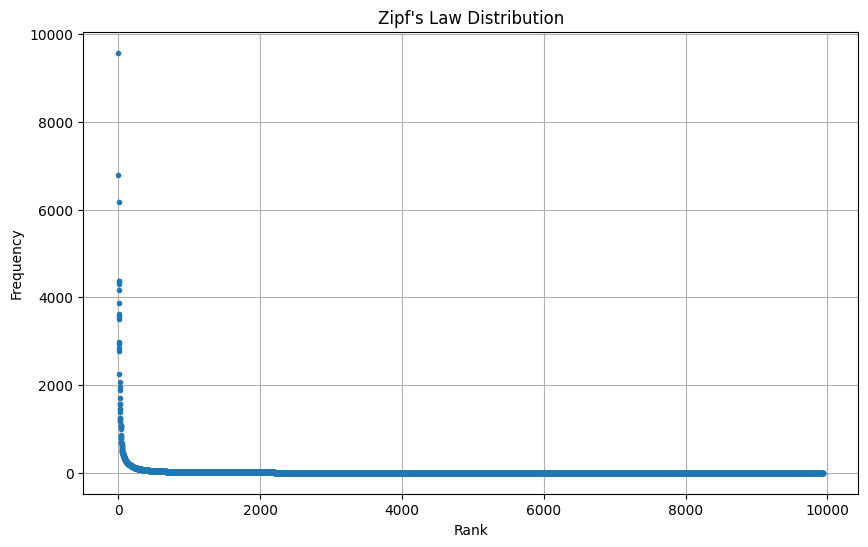

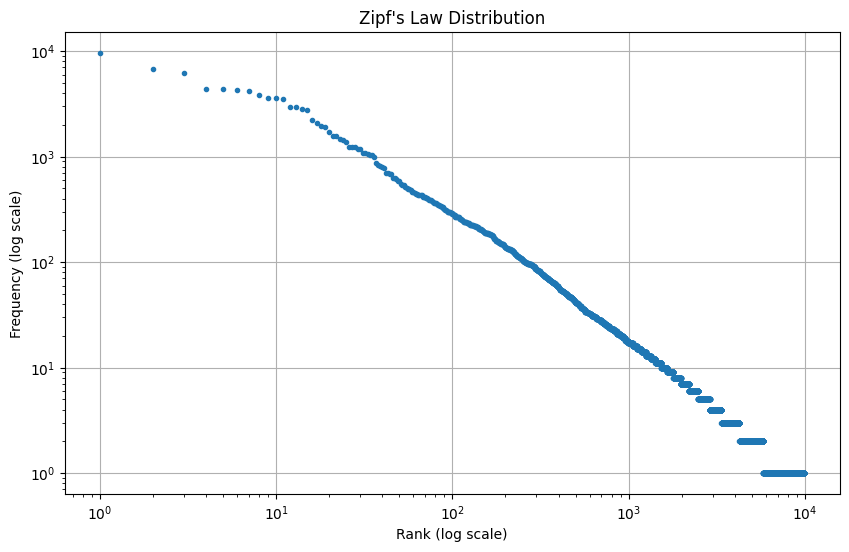

Estimated exponent 's' in Zipf's Law: 1.3265029948536835


In [58]:
##Zipf's Law
clean_tokens_lower = [word.lower() for word in clean_tokens]
word_frequencies = Counter(clean_tokens_lower)
sorted_frequencies = sorted(word_frequencies.values(), reverse=True)

# Create an array of ranks (1, 2, 3, ...)
ranks = np.arange(1, len(sorted_frequencies) + 1)


plt.figure(figsize=(10, 6))
plt.plot(ranks, sorted_frequencies, marker='.', linestyle='None')
plt.title("Zipf's Law Distribution")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot the data on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(ranks, sorted_frequencies, marker='.', linestyle='None')
plt.title("Zipf's Law Distribution")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True)
plt.show()

from scipy.stats import linregress

# Assuming you have already calculated ranks and sorted_frequencies as mentioned earlier
log_ranks = np.log(ranks)
log_frequencies = np.log(sorted_frequencies)

# Fit a linear regression model to the log-log data
slope, intercept, r_value, p_value, std_err = linregress(log_ranks, log_frequencies)

# The slope of the regression line represents the estimated exponent 's'
estimated_s = -slope

print(f"Estimated exponent 's' in Zipf's Law: {estimated_s}")

# Stopwords, wordcloud, hapaxes, lexical dispersion

In [59]:
from nltk.corpus import stopwords
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
stop_words=stopwords.words('english')

In [61]:
#Note that All_words is case sensitive (later will use all_words)
#A reason for this is to preserve capitalization of proper names in a word cloud
All_words = [word for word in clean_tokens if word.casefold() not in stop_words]

In [62]:
print(All_words[0:20])

['Prince', 'always', 'liked', 'London', 'come', 'one', 'modern', 'Romans', 'find', 'Thames', 'convincing', 'image', 'truth', 'ancient', 'state', 'left', 'Tiber', 'Brought', 'legend', 'City']


In [63]:
All_fd=nltk.FreqDist(All_words)

In [64]:
All_fd

FreqDist({'would': 804, 'Maggie': 693, 'one': 659, 'Charlotte': 593, 'might': 578, 'could': 518, 'little': 464, 'even': 448, 'said': 444, 'made': 437, ...})

In [ ]:
All_fd.most_common(100)

In [66]:
from wordcloud import WordCloud

In [67]:
wordcloud = WordCloud(width = 1000, height = 800,
                      background_color ='white',
                      max_words=200,
                      prefer_horizontal=0.5,
                      random_state=4,
                      contour_color='steelblue').generate_from_frequencies(All_fd)

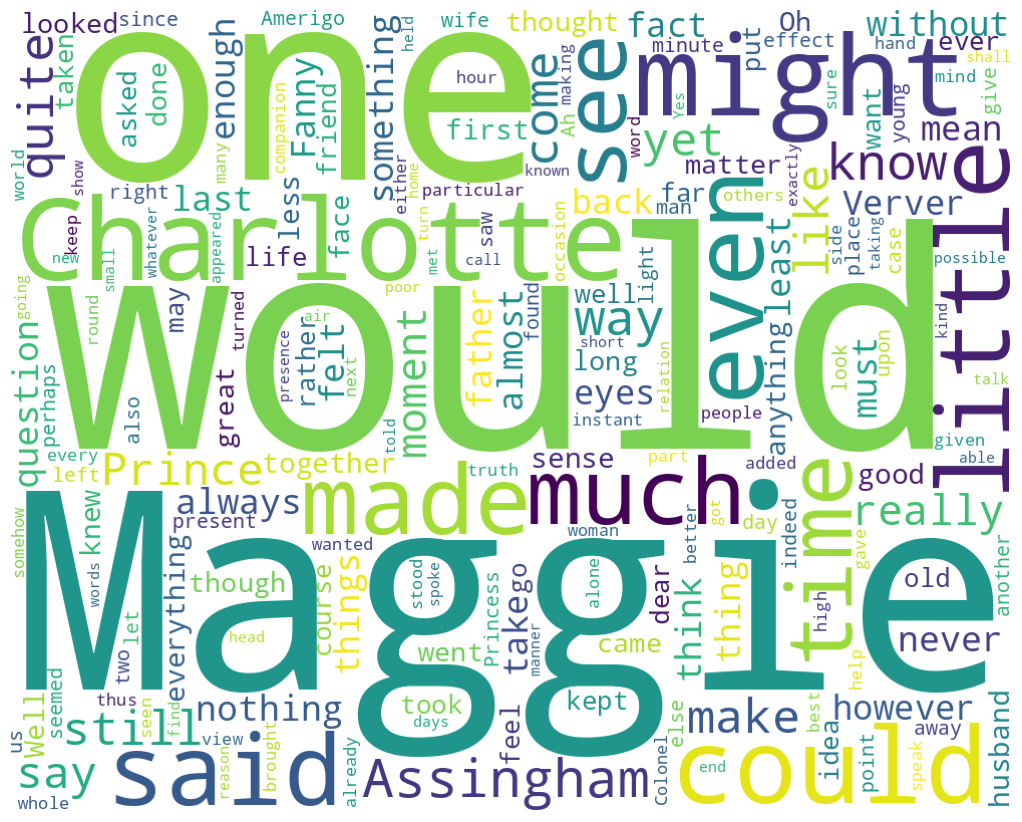

In [68]:
# plot the WordCloud image
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = -0.1)

plt.show()

In [69]:
#Now working with all words lower case
all_words = [word.lower() for word in All_words]

In [70]:
all_fd=nltk.FreqDist(all_words)

In [71]:
single_words=all_fd.hapaxes()

In [72]:
len(single_words)

4118

In [73]:
import random

In [74]:
random.choices(single_words,k=20)

['incessantly',
 'lumpish',
 'normally',
 'accompaniment',
 'stimulate',
 'fathomless',
 'functionaries',
 'condemn',
 'exclusion',
 'advertised',
 'species',
 'rooted',
 'rhythmically',
 'particle',
 'growler',
 'slimness',
 'dilemma',
 'parchments',
 'dangled',
 'courtesy']

In [75]:
Top_words = [word for (word, freq) in All_fd.most_common(10)]
print(Top_words)

['would', 'Maggie', 'one', 'Charlotte', 'might', 'could', 'little', 'even', 'said', 'made']


In [76]:
from nltk.draw.dispersion import dispersion_plot

<Figure size 1200x900 with 0 Axes>

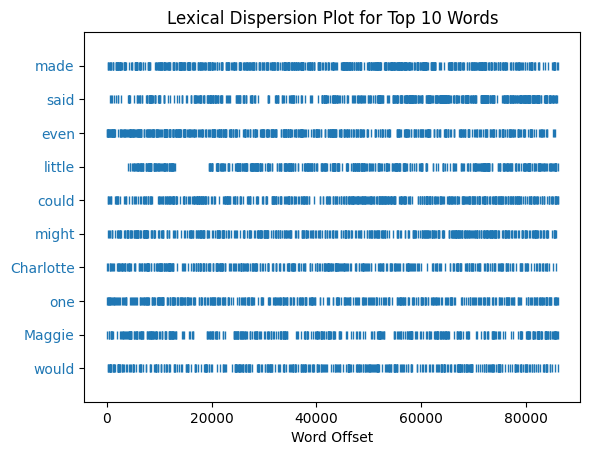

In [77]:
plt.figure(figsize=(12, 9))
dispersion_plot(All_words, Top_words, ignore_case=True, title='Lexical Dispersion Plot for Top 10 Words')
plt.show()

In [78]:
V = set(all_words)
long_words = [w for w in V if len(w) > 12]

In [ ]:
long_words

In [80]:
big_words=sorted(w for w in set(long_words) if len(w) > 10 and all_fd[w] > 7)
len(big_words)

15

In [81]:
print(big_words)

['comparatively', 'complications', 'consciousness', 'consideration', 'demonstration', 'distinguished', 'extraordinarily', 'extraordinary', 'inconsequence', 'instinctively', 'opportunities', 'possibilities', 'responsibility', 'understanding', 'unprecedented']


<Figure size 1200x900 with 0 Axes>

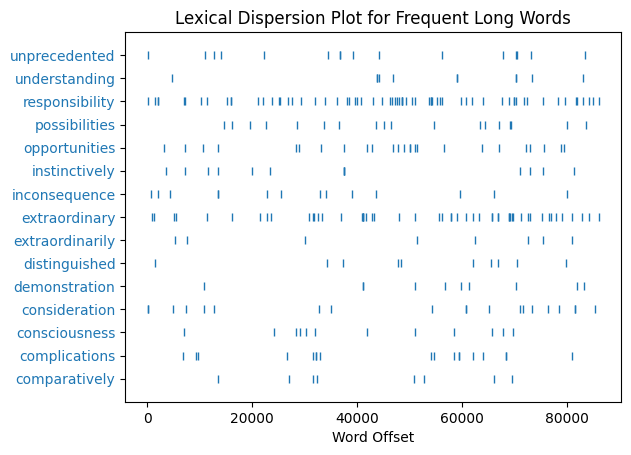

In [82]:
plt.figure(figsize=(12, 9))
dispersion_plot(all_words, big_words, ignore_case=True, title='Lexical Dispersion Plot for Frequent Long Words')
plt.show()

# Bigrams and Trigrams

In [83]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures


finder = BigramCollocationFinder.from_words(clean_tokens)



In [84]:
frequent_bigrams = finder.nbest(BigramAssocMeasures.raw_freq, 100)
print(frequent_bigrams)

[('of', 'the'), ('in', 'the'), ('she', 'had'), ('of', 'her'), ('he', 'had'), ('it', 'was'), ('to', 'be'), ('to', 'the'), ('had', 'been'), ('for', 'the'), ('on', 'the'), ('of', 'his'), ('as', 'if'), ('that', 'she'), ('at', 'the'), ('of', 'a'), ('to', 'her'), ('have', 'been'), ('with', 'the'), ('she', 'was'), ('and', 'the'), ('in', 'her'), ('for', 'her'), ('that', 'he'), ('don', 't'), ('as', 'she'), ('It', 'was'), ('didn', 't'), ('a', 'little'), ('of', 'it'), ('I', 've'), ('all', 'the'), ('of', 'their'), ('would', 'have'), ('the', 'Prince'), ('as', 'a'), ('with', 'a'), ('She', 'had'), ('for', 'a'), ('with', 'her'), ('by', 'the'), ('might', 'have'), ('he', 'was'), ('the', 'same'), ('it', 's'), ('I', 'm'), ('from', 'the'), ('that', 'I'), ('that', 'the'), ('in', 'a'), ('of', 'which'), ('as', 'he'), ('was', 'the'), ('her', 'father'), ('so', 'much'), ('would', 'be'), ('I', 'don'), ('it', 'had'), ('was', 'to'), ('It', 's'), ('her', 'own'), ('in', 'his'), ('was', 'a'), ('to', 'have'), ('what', 

In [85]:
finder.apply_freq_filter(5)  # This filters out bigrams that occur less than 5 times
statistical_bigrams = finder.nbest(BigramAssocMeasures.raw_freq, 5)  # Adjust as needed
# also try bigram_measures.pmi, bigram_measures.chi_sq,likelihood_ratio,student_t,likelihood_ratio
statistical_bigrams


[('of', 'the'), ('in', 'the'), ('she', 'had'), ('of', 'her'), ('he', 'had')]

In [86]:
len(statistical_bigrams)

5

In [87]:

from nltk import bigrams
from nltk.probability import ConditionalFreqDist

def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        # Get the most frequent next words (up to 3)
        next_words = list(cfdist[word].keys())[:3]
        if next_words:
            # Randomly choose from the top 3 words
            word = random.choice(next_words)
        else:
            break

# Your existing list of words
# clean_tokens = ["your", "list", "of", "word", "tokens", "here", "..."]  # Replace with your token list

# Generate bigrams from your list of words
clean_bigrams = bigrams(clean_tokens)

# Create a Conditional Frequency Distribution (CFD) from these bigrams
cfd = ConditionalFreqDist(clean_bigrams)

# Example usage
generate_model(cfd, 'She')  # Replace 'your_seed_word' with your desired starting word


She had at comparatively unconnected with failure sat in May not indeed to him now 

In [88]:
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder



# Create a trigram measures object
trigram_measures = TrigramAssocMeasures()

# Create a Trigram finder
finder = TrigramCollocationFinder.from_words(clean_tokens)

# You can then find trigrams using different measures, e.g., by raw frequency
trigrams = finder.nbest(trigram_measures.raw_freq, 10)  # top 10 trigrams
# trigrams = finder.nbest(trigram_measures.pmi, 20)  # top 10 trigrams
# trigrams=finder.nbest(trigram_measures.likelihood_ratio,20)

# Print trigrams
for trigram in trigrams:
    print(trigram)


('I', 'don', 't')
('might', 'have', 'been')
('one', 'of', 'the')
('would', 'have', 'been')
('at', 'any', 'rate')
('in', 'the', 'world')
('that', 'she', 'had')
('as', 'if', 'she')
('was', 'as', 'if')
('that', 'he', 'had')


In [89]:
from nltk import trigrams


def generate_model(cfdist, word1, word2, num=15):
    print(word1, word2, end=' ')
    for i in range(num - 2):  # Adjust the range since two words are already printed
        next_words = list(cfdist[(word1, word2)].keys())[:3]
        if next_words:
            next_word = random.choice(next_words)
            print(next_word, end=' ')
            word1, word2 = word2, next_word
        else:
            break


# Your existing list of words
# clean_tokens = ["your", "list", "of", "word", "tokens", "here", "..."]

# Generate trigrams from your list of words
clean_trigrams = trigrams(clean_tokens)

# Create a Conditional Frequency Distribution (CFD) from these trigrams
cfd = ConditionalFreqDist(((w1, w2), w3) for w1, w2, w3 in clean_trigrams)

# Example usage, with two seed words
generate_model(cfd, 'The', 'only')  # Replace with your desired starting words


The only fear somewhat sharp for Verver was struck he had strayed simply enough into 

In [90]:
#

# Lemmmatization, contractions

First let's normalize contractions. So we hope to replace things like "let's" with "let us" and "can't" with "cannot", etc.

In [92]:
!pip install contractions
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.4 MB/s eta 0:00:00


In [104]:
help(contractions)

Help on package contractions:

NAME
    contractions

PACKAGE CONTENTS
    data (package)
    test___init__

FUNCTIONS
    add(key, value)
    
    fix(s, leftovers=True, slang=True)
    
    get_combinations(tokens, joiners)
    
    intersperse(lst, item)
    
    preview(text, flank)
        Return all contractions and their location before fix for manual check. Also provide a viewing window to quickly
        preview the contractions in the text.
        :param text: texture.
        :param flank: int number, control the size of the preview window. The window would be "flank-contraction-flank".
        :return: preview_items, a list includes all matched contractions and their locations.

DATA
    comb = "you'd've"
    contractions_dict = {"'cause": 'because', "'em": 'them', "'tis": 'it i...
    json_open = b'{\n     "\'aight": "alright",\n     "abt": "ab...a": "wa...
    k = 'you’d’ve'
    leftovers_dict = {"'all": '', "'am": '', "'cause": 'because', "'coz": ...
    month = 'decemb

In [112]:
expanded_text = contractions.fix(raw)

In [101]:
expanded_text

'       The Prince had always liked his London, when it had come to him; he was one of the modern Romans who find by the Thames a more convincing image of the truth of the ancient state than any they have left by the Tiber. Brought up on the legend of the City to which the world paid tribute, he recognised in the present London much more than in contemporary Rome the real dimensions of such a case. If it was a question of an Imperium, he said to himself, and if one wished, as a Roman, to recover a little the sense of that, the place to do so was on London Bridge, or even, on a fine afternoon in May, at Hyde Park Corner. It was not indeed to either of those places that these grounds of his predilection, after all sufficiently vague, had, at the moment we are concerned with him, guided his steps; he had strayed, simply enough, into Bond Street, where his imagination, working at comparatively short range, caused him now and then to stop before a window in which objects massive and lumpish

In [113]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [114]:
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Assuming 'expanded_text' is your text after expanding contractions
# expanded_text = "Your expanded text here"

# Tokenize the text
tokens = word_tokenize(expanded_text)

# Lemmatize each word
lemmatized_text = ' '.join([lemmatizer.lemmatize(token) for token in tokens])

lemmatized_text


'The Prince had always liked his London , when it had come to him ; he wa one of the modern Romans who find by the Thames a more convincing image of the truth of the ancient state than any they have left by the Tiber . Brought up on the legend of the City to which the world paid tribute , he recognised in the present London much more than in contemporary Rome the real dimension of such a case . If it wa a question of an Imperium , he said to himself , and if one wished , a a Roman , to recover a little the sense of that , the place to do so wa on London Bridge , or even , on a fine afternoon in May , at Hyde Park Corner . It wa not indeed to either of those place that these ground of his predilection , after all sufficiently vague , had , at the moment we are concerned with him , guided his step ; he had strayed , simply enough , into Bond Street , where his imagination , working at comparatively short range , caused him now and then to stop before a window in which object massive and 

In [129]:
lemmatized_text[30:200]

's London , when it had come to him ; he wa one of the modern Romans who find by the Thames a more convincing image of the truth of the ancient state than any they have le'

In [130]:
all_tokens=word_tokenize(lemmatized_text)#.lower())

In [131]:
clean_tokens=[word for word in all_tokens if word.isalpha()]

In [133]:
print(clean_tokens[0:100])

['The', 'Prince', 'had', 'always', 'liked', 'his', 'London', 'when', 'it', 'had', 'come', 'to', 'him', 'he', 'wa', 'one', 'of', 'the', 'modern', 'Romans', 'who', 'find', 'by', 'the', 'Thames', 'a', 'more', 'convincing', 'image', 'of', 'the', 'truth', 'of', 'the', 'ancient', 'state', 'than', 'any', 'they', 'have', 'left', 'by', 'the', 'Tiber', 'Brought', 'up', 'on', 'the', 'legend', 'of', 'the', 'City', 'to', 'which', 'the', 'world', 'paid', 'tribute', 'he', 'recognised', 'in', 'the', 'present', 'London', 'much', 'more', 'than', 'in', 'contemporary', 'Rome', 'the', 'real', 'dimension', 'of', 'such', 'a', 'case', 'If', 'it', 'wa', 'a', 'question', 'of', 'an', 'Imperium', 'he', 'said', 'to', 'himself', 'and', 'if', 'one', 'wished', 'a', 'a', 'Roman', 'to', 'recover', 'a', 'little']


In [134]:
All_words = [word for word in clean_tokens if word.casefold() not in stop_words]

In [136]:
print(All_words[0:100])

['Prince', 'always', 'liked', 'London', 'come', 'wa', 'one', 'modern', 'Romans', 'find', 'Thames', 'convincing', 'image', 'truth', 'ancient', 'state', 'left', 'Tiber', 'Brought', 'legend', 'City', 'world', 'paid', 'tribute', 'recognised', 'present', 'London', 'much', 'contemporary', 'Rome', 'real', 'dimension', 'case', 'wa', 'question', 'Imperium', 'said', 'one', 'wished', 'Roman', 'recover', 'little', 'sense', 'place', 'wa', 'London', 'Bridge', 'even', 'fine', 'afternoon', 'May', 'Hyde', 'Park', 'Corner', 'wa', 'indeed', 'either', 'place', 'ground', 'predilection', 'sufficiently', 'vague', 'moment', 'concerned', 'guided', 'step', 'strayed', 'simply', 'enough', 'Bond', 'Street', 'imagination', 'working', 'comparatively', 'short', 'range', 'caused', 'stop', 'window', 'object', 'massive', 'lumpish', 'silver', 'gold', 'form', 'precious', 'stone', 'contribute', 'leather', 'steel', 'brass', 'applied', 'hundred', 'us', 'abuse', 'tumbled', 'together', 'insolence', 'Empire', 'loot']


In [122]:
All_fd=nltk.FreqDist(All_words)

In [123]:
All_fd

FreqDist({'wa': 3057, 'would': 945, 'Maggie': 700, 'one': 683, 'could': 642, 'might': 601, 'Charlotte': 600, 'little': 467, 'thing': 458, 'time': 452, ...})

In [124]:
wordcloud = WordCloud(width = 1000, height = 800,
                      background_color ='white',
                      max_words=200,
                      prefer_horizontal=0.5,
                      random_state=4,
                      contour_color='steelblue').generate_from_frequencies(All_fd)

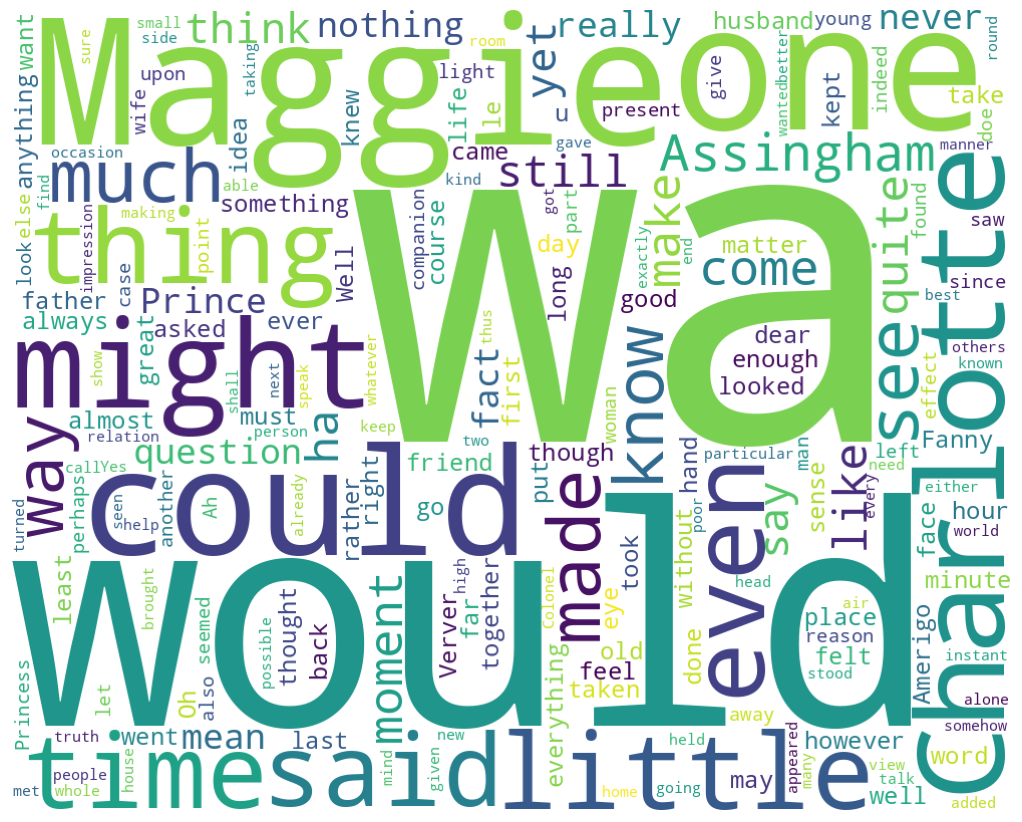

In [125]:
# plot the WordCloud image
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = -0.1)

plt.show()

In [127]:
Top_words = [word for (word, freq) in All_fd.most_common(10)]
print(Top_words)

['wa', 'would', 'Maggie', 'one', 'could', 'might', 'Charlotte', 'little', 'thing', 'time']


<Figure size 1200x900 with 0 Axes>

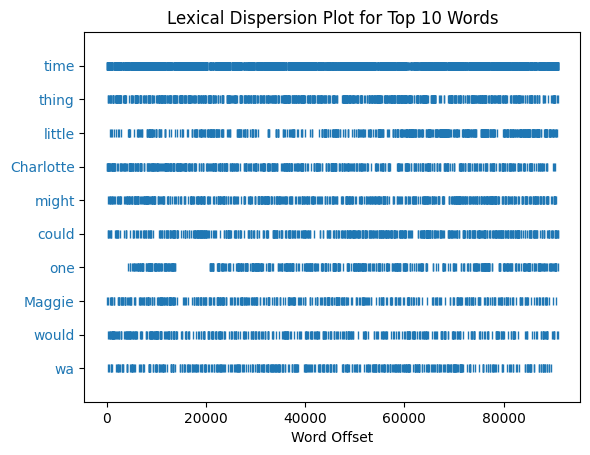

In [128]:
plt.figure(figsize=(12, 9))
dispersion_plot(All_words, Top_words, ignore_case=True, title='Lexical Dispersion Plot for Top 10 Words')
plt.show()